## Stable Diffusion Train Execution Time per ML module Data Analysis

In [4]:
!pip install seaborn

     |████████████████████████████████| 294 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 10.1 MB/s eta 0:00:01
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
     |████████████████████████████████| 1.2 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 11.3 MB/s eta 0:00:01


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

- Load Data

In [2]:
csv_path = "/home/hjhwang/stable-diffusion/experiments/stable_diffusion_train_execution_time_data.csv"
df = pd.read_csv(csv_path)
df.head()

,batch_size,encoder_forward,diffusion_forward,diffusion_backward
0,4,0.046873,0.045396,0.109397
1,4,0.046763,0.045416,0.109398
2,4,0.047061,0.045389,0.109708
3,4,0.047071,0.045595,0.109630
4,4,0.046825,0.045330,0.109641


- Describe Data

In [ ]:
df.describe()

,batch_size,encoder_forward,diffusion_forward,diffusion_backward
count,4688.000000,4688.000000,4688.000000,4688.000000
mean,8.535836,0.095874,0.079153,0.193119
std,7.432822,0.080236,0.054364,0.135830
min,4.000000,0.046191,0.045220,0.109039
25%,4.000000,0.046797,0.045521,0.109662
50%,4.000000,0.047070,0.045806,0.109973
75%,8.000000,0.090372,0.076596,0.185323
max,32.000000,0.353382,0.251925,0.625128


In [15]:
df_4 = df[df['batch_size'] == 4]
df_4.describe()

,batch_size,encoder_forward,diffusion_forward,diffusion_backward
count,2500.0,2500.000000,2500.000000,2500.000000
mean,4.0,0.046796,0.045559,0.109684
std,0.0,0.000196,0.000150,0.000180
min,4.0,0.046191,0.045220,0.109039
25%,4.0,0.046633,0.045456,0.109565
50%,4.0,0.046815,0.045530,0.109676
75%,4.0,0.046947,0.045631,0.109798
max,4.0,0.047426,0.046473,0.110345


In [7]:
df_8 = df[df['batch_size'] == 8]
df_8.describe()

,batch_size,encoder_forward,diffusion_forward,diffusion_backward
count,1250.0,1250.000000,1250.000000,1250.000000
mean,8.0,0.090237,0.076430,0.185150
std,0.0,0.000160,0.000381,0.000210
min,8.0,0.089813,0.075785,0.184559
25%,8.0,0.090128,0.076231,0.185009
50%,8.0,0.090205,0.076418,0.185156
75%,8.0,0.090324,0.076557,0.185276
max,8.0,0.090738,0.078844,0.186033


In [8]:
df_16 = df[df['batch_size'] == 16]
df_16.describe()

,batch_size,encoder_forward,diffusion_forward,diffusion_backward
count,625.0,625.000000,625.000000,625.000000
mean,16.0,0.176946,0.133209,0.328129
std,0.0,0.000374,0.000408,0.000413
min,16.0,0.176247,0.132378,0.327125
25%,16.0,0.176760,0.132912,0.327806
50%,16.0,0.176912,0.133124,0.328140
75%,16.0,0.177041,0.133470,0.328404
max,16.0,0.179601,0.134422,0.329436


In [9]:
df_32 = df[df['batch_size'] == 32]
df_32.describe()

,batch_size,encoder_forward,diffusion_forward,diffusion_backward
count,313.0,313.000000,313.000000,313.000000
mean,32.0,0.348496,0.250416,0.621775
std,0.0,0.009772,0.006682,0.016682
min,32.0,0.176468,0.132733,0.327809
25%,32.0,0.348754,0.250577,0.622252
50%,32.0,0.348967,0.250818,0.622605
75%,32.0,0.349210,0.251009,0.623162
max,32.0,0.353382,0.251925,0.625128


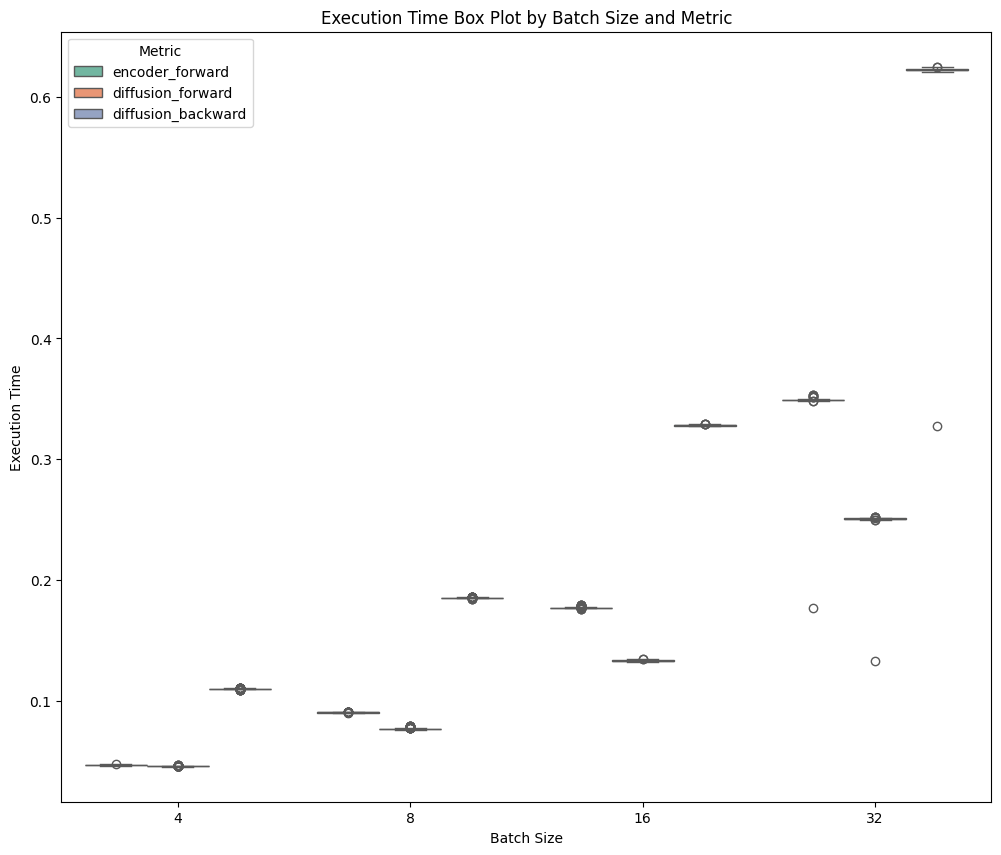

In [32]:
df_melted = pd.melt(df, id_vars=['batch_size'], value_vars=['encoder_forward', 'diffusion_forward', 'diffusion_backward'], 
                    var_name='metric', value_name='value')

plt.figure(figsize=(12, 10))
box_plot = sns.boxplot(x='batch_size', y='value', hue='metric', data=df_melted, palette='Set2')

colors = ['blue', 'green', 'red']
for i, artist in enumerate(box_plot.artists):
    artist.set_edgecolor(colors[i % 3])  
    artist.set_linewidth(0.00000001)  

plt.title("Execution Time Box Plot by Batch Size and Metric")
plt.xlabel('Batch Size')
plt.ylabel('Execution Time')
plt.legend(title='Metric')
plt.show()

- Encoder Forward

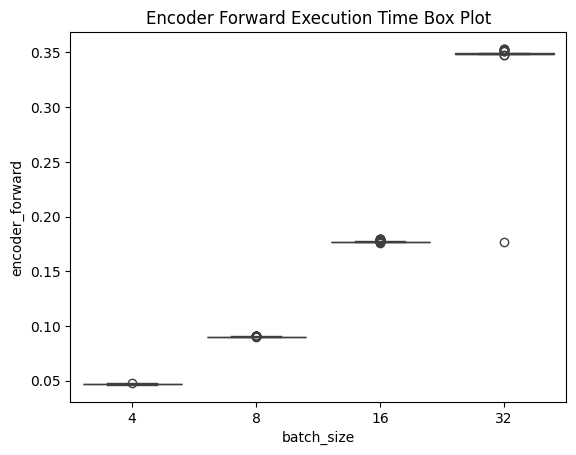

In [36]:
sns.boxplot(x="batch_size", y="encoder_forward", data=df)
plt.title("Encoder Forward Execution Time Box Plot")
plt.show()

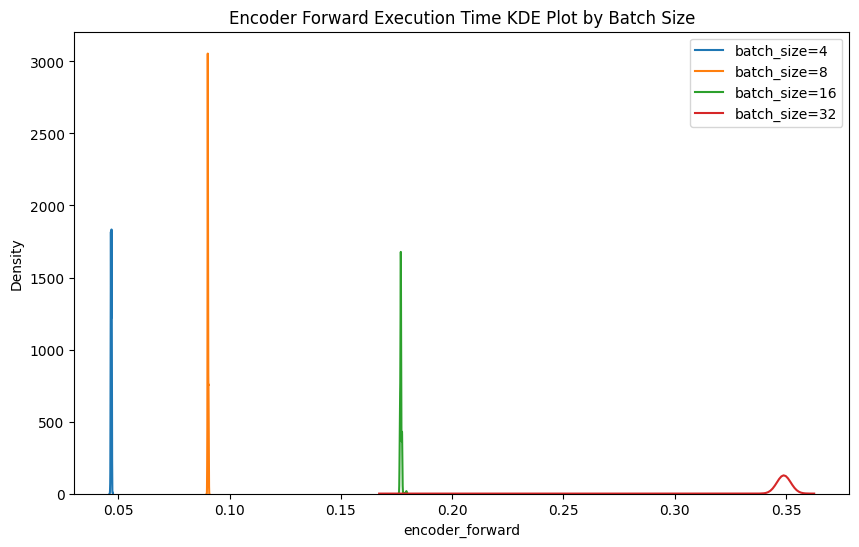

In [6]:
plt.figure(figsize=(10, 6))

batch_sizes = df['batch_size'].unique()
for batch_size in batch_sizes:
    subset = df[df['batch_size'] == batch_size]
    sns.kdeplot(subset['encoder_forward'], label=f'batch_size={batch_size}')

plt.title('Encoder Forward Execution Time KDE Plot by Batch Size')
plt.xlabel('encoder_forward')
plt.ylabel('Density')
plt.legend()
plt.show()


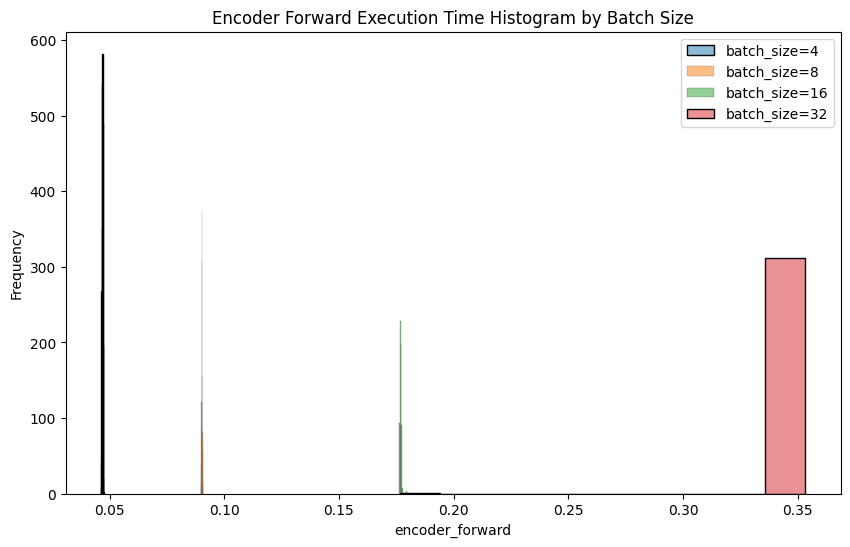

In [9]:
plt.figure(figsize=(10, 6))

batch_sizes = df['batch_size'].unique()
for batch_size in batch_sizes:
    subset = df[df['batch_size'] == batch_size]
    sns.histplot(subset['encoder_forward'], bins=10, label=f'batch_size={batch_size}', kde=False, alpha=0.5)

plt.title('Encoder Forward Execution Time Histogram by Batch Size')
plt.xlabel('encoder_forward')
plt.ylabel('Frequency')
plt.legend()
plt.show()


- Diffusion  Forward

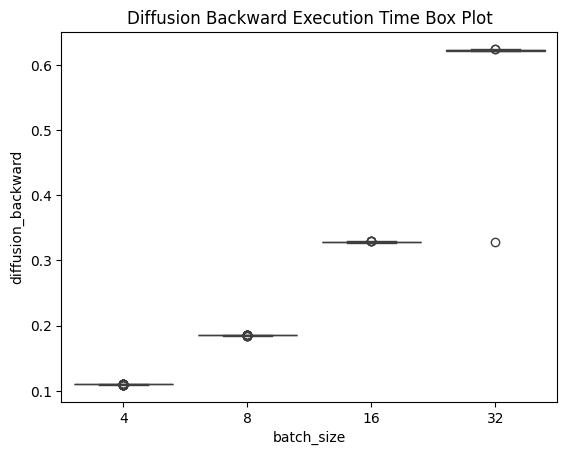

In [21]:
sns.boxplot(x="batch_size", y="diffusion_backward", data=df)
plt.title("Diffusion Backward Execution Time Box Plot")
plt.show()

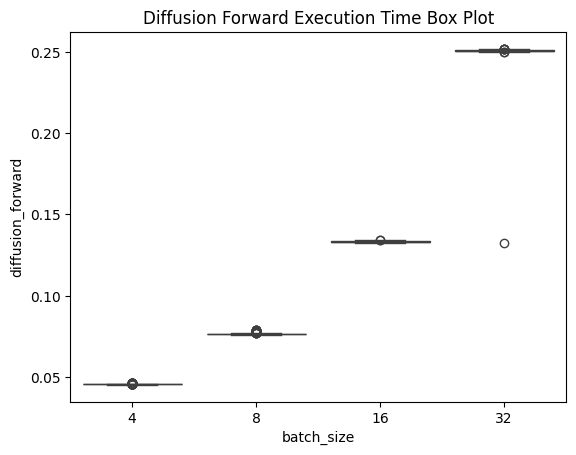

In [20]:
sns.boxplot(x="batch_size", y="diffusion_forward", data=df)
plt.title("Diffusion Forward Execution Time Box Plot")
plt.show()

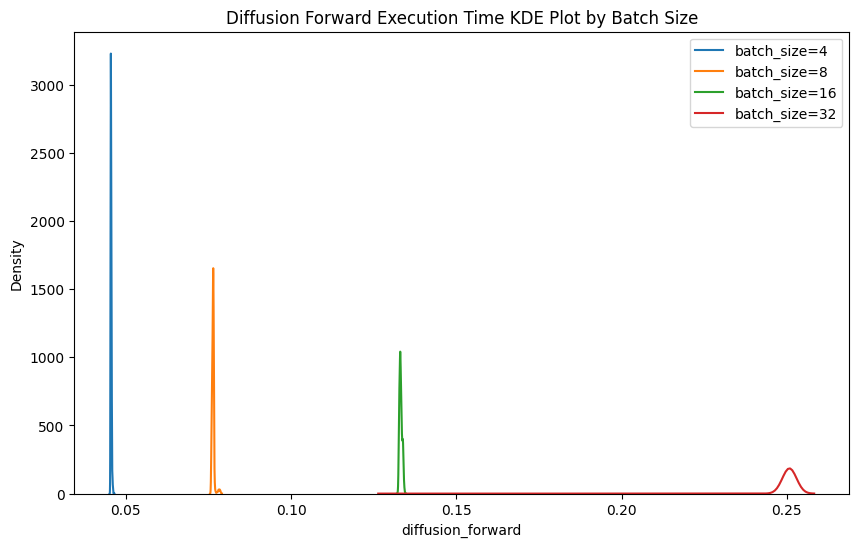

In [10]:
plt.figure(figsize=(10, 6))

batch_sizes = df['batch_size'].unique()
for batch_size in batch_sizes:
    subset = df[df['batch_size'] == batch_size]
    sns.kdeplot(subset['diffusion_forward'], label=f'batch_size={batch_size}')

plt.title('Diffusion Forward Execution Time KDE Plot by Batch Size')
plt.xlabel('diffusion_forward')
plt.ylabel('Density')
plt.legend()
plt.show()


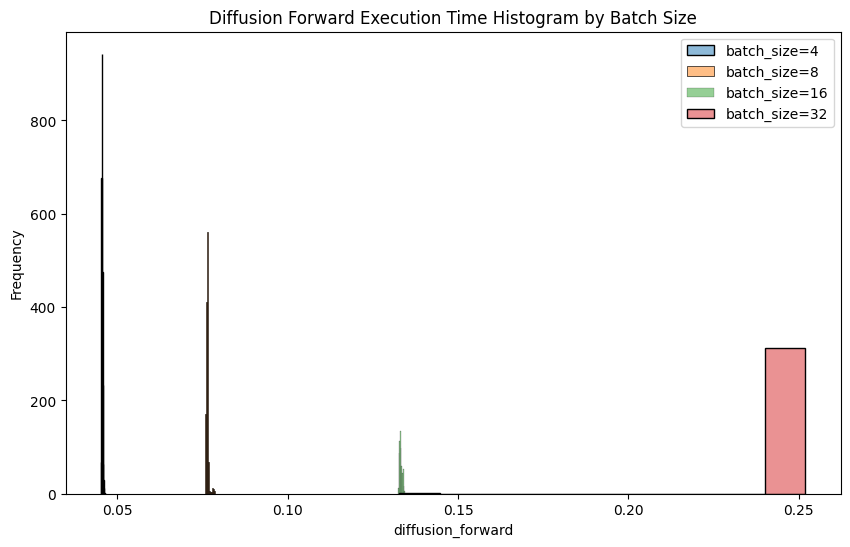

In [11]:
plt.figure(figsize=(10, 6))

batch_sizes = df['batch_size'].unique()
for batch_size in batch_sizes:
    subset = df[df['batch_size'] == batch_size]
    sns.histplot(subset['diffusion_forward'], bins=10, label=f'batch_size={batch_size}', kde=False, alpha=0.5)

plt.title('Diffusion Forward Execution Time Histogram by Batch Size')
plt.xlabel('diffusion_forward')
plt.ylabel('Frequency')
plt.legend()
plt.show()


- Diffusion Backward

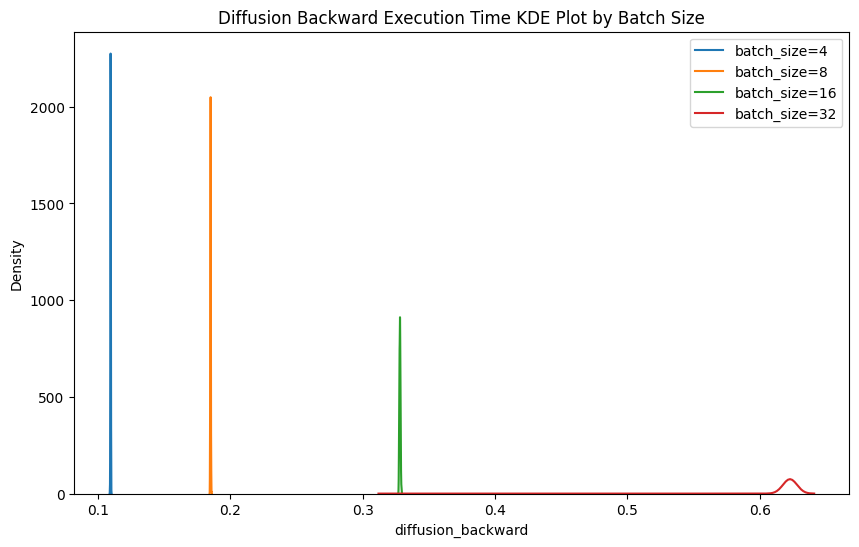

In [12]:
plt.figure(figsize=(10, 6))

batch_sizes = df['batch_size'].unique()
for batch_size in batch_sizes:
    subset = df[df['batch_size'] == batch_size]
    sns.kdeplot(subset['diffusion_backward'], label=f'batch_size={batch_size}')

plt.title('Diffusion Backward Execution Time KDE Plot by Batch Size')
plt.xlabel('diffusion_backward')
plt.ylabel('Density')
plt.legend()
plt.show()


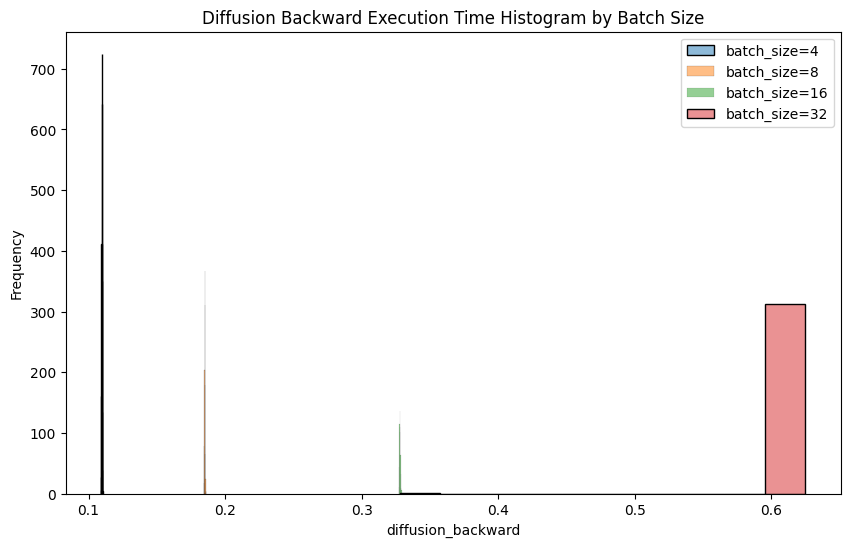

In [13]:
plt.figure(figsize=(10, 6))

batch_sizes = df['batch_size'].unique()
for batch_size in batch_sizes:
    subset = df[df['batch_size'] == batch_size]
    sns.histplot(subset['diffusion_backward'], bins=10, label=f'batch_size={batch_size}', kde=False, alpha=0.5)

plt.title('Diffusion Backward Execution Time Histogram by Batch Size')
plt.xlabel('diffusion_backward')
plt.ylabel('Frequency')
plt.legend()
plt.show()
